# Loan Approval Prediction

## EDA-Exploratory Data Analysis

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('Loan_Approval_Dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [154]:
# Print out the basic info of the dataset to vew datatypes, column names, and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [155]:
# Print out column names. Notice the leading spaces. We want to remove these
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [156]:
# Drop loan_id as it is a duplicate indicator
del df['loan_id']

In [157]:
# Edit all columns to remove the spaces in front of the column name (and behind if there are any)
df.columns = df.columns.str.strip()

# Check to make sure it worked properly
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [160]:
# Clean entire columns to remove leading and trailing blank spaces for non-numerical columns

# List of columns to be cleaned
columns_to_clean = ['education', 'self_employed', 'loan_status']

# Loop through each column and strip spaces
for col in columns_to_clean:
    df[col] = df[col].str.strip()

In [161]:
# Make sure all desired changes were made
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [25]:
# Checking for missing values
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


### Analysis and Visualizations

In [163]:
# Run a statistical summary on all columns of the dataframe to get an 
# overall understanding of the data before graphing
print(df.describe())

       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637

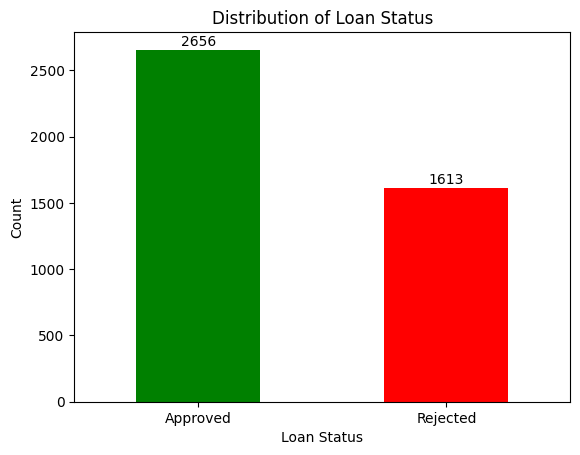

In [165]:
# Graph an overall view of loans approved vs loans denied by count

# Count the occurrences of each class in 'loan_status'
loan_status_counts = df['loan_status'].value_counts()

# Define custom colors for the bars
colors = ['green', 'red']

# Create a bar plot
ax = loan_status_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Loan Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Distribution of Loan Status')

# Add value counts on top of the bars
for i, v in enumerate(loan_status_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

We can see that there are more approved loans than rejected loans. 

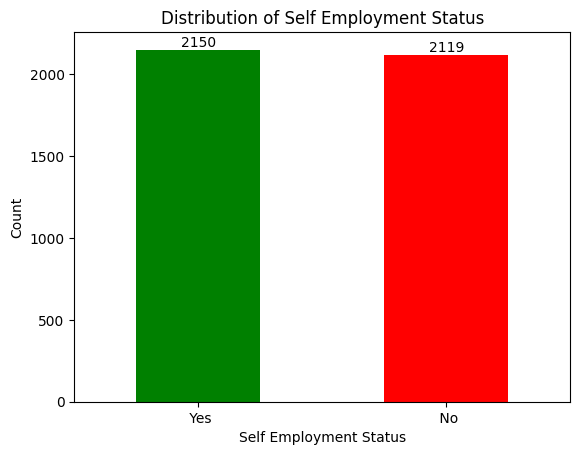

In [114]:
# Graph an overall view of self-employment status by count

# Count the occurrences of each class in 'education'
self_employed_status_counts = df['self_employed'].value_counts()

# Define custom colors for the bars
colors = ['green', 'red']

# Create a bar plot
ax = self_employed_status_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Self Employed Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Distribution of Self Employed Status')

# Add counts on top of the bars
for i, count in enumerate(self_employed_status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

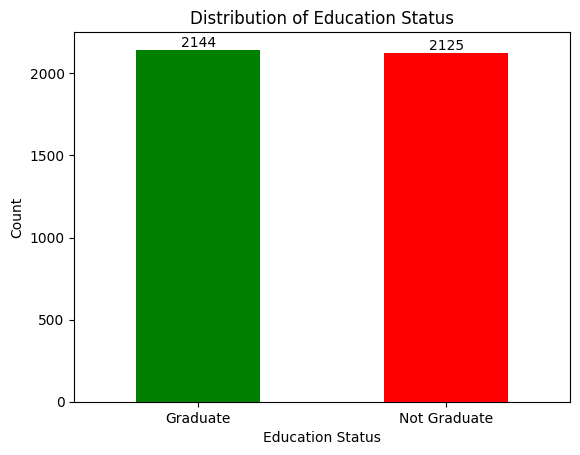

In [169]:
# Graph an overall view of the education status by count

# Count the occurrences of each class in 'education'
education_status_counts = df['education'].value_counts()

# Define custom colors for the bars
colors = ['green', 'red']

# Create a bar plot
ax = education_status_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Education Status')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Distribution of Education Status')

# Add counts on top of the bars
for i, count in enumerate(education_status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

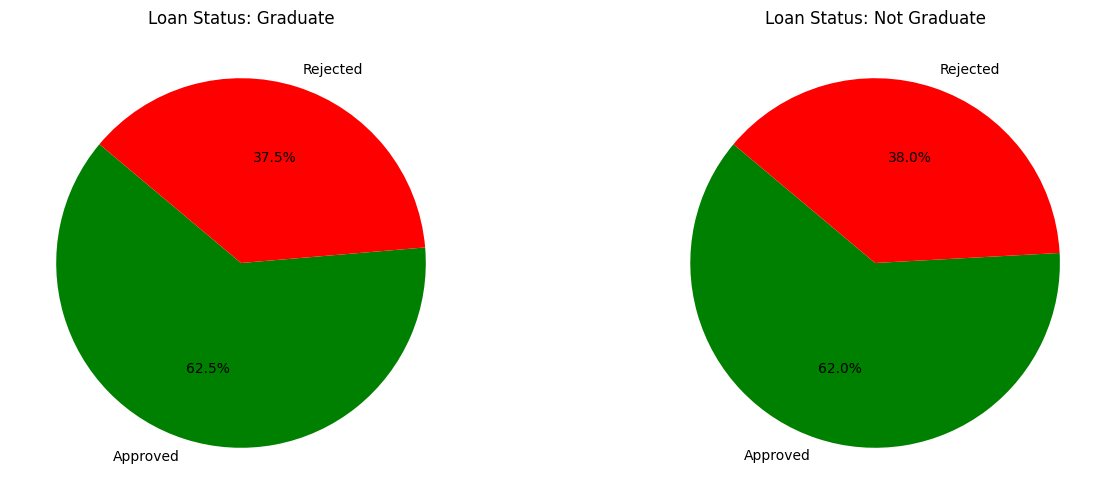

In [172]:
# Look at percentage of loan approval and rejections based on education level (graduated vs. not graduated)

# Group the data by 'Education' and 'Loan_Status' columns
approval_by_education = df.groupby(['education', 'loan_status']).size().unstack(fill_value=0)

# Define colors for the pie chart
colors = ['green', 'red']

# Create a figure with subplots
fig, axs = plt.subplots(1, approval_by_education.shape[0], figsize=(15, 6))

# Loop through each education category to create a pie chart
for i, (education, counts) in enumerate(approval_by_education.iterrows()):
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Loan Status: {education}')

# Display the figure
plt.show()

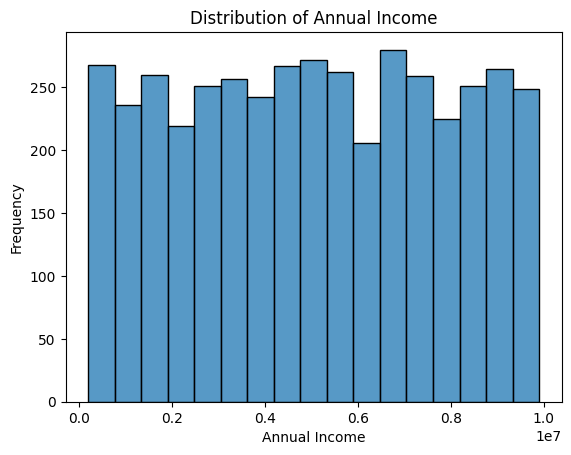

In [166]:
# Look at the distribution of annual income by how frequently various annual incomes occur within the dataset

# Distribution of annual income
sns.histplot(df['income_annum'])

# Set the labels and title using matplotlib functions
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

# Display the plot
plt.show()

C:\Users\alici\AppData\Local\Temp\ipykernel_20820\3392738083.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['cibil_score_bins', 'loan_status']).size().unstack(fill_value=0)


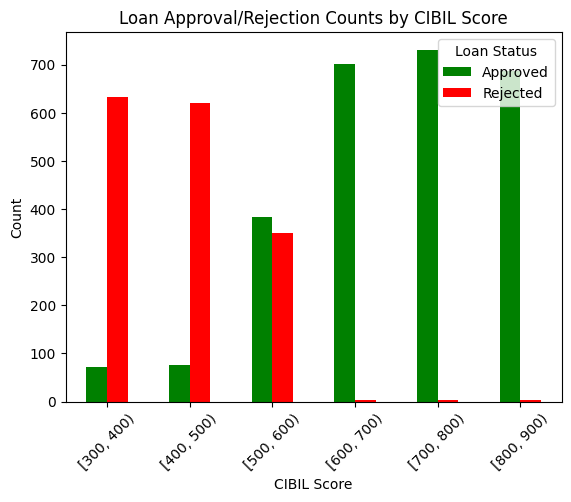

In [145]:
# Look at loan approval/rejection status based on CIBIL score, keeping in mind that 
# CIBIL scores can be anywhere between 300 and 900, with higher scores being more desireable

# Define bins for CIBIL score
bins = np.arange(300, 901, 100)  # Bins from 300 to 900, every 100 points

# Create a new column for the CIBIL score bins
df['cibil_score_bins'] = pd.cut(df['cibil_score'], bins=bins, right=False)

# Group by bins and loan status, then count occurrences
grouped_data = df.groupby(['cibil_score_bins', 'loan_status']).size().unstack(fill_value=0)

# Define colors for each loan status
color_mapping = {'Approved': 'green', 'Rejected': 'red'}
colors = [color_mapping.get(status, 'blue') for status in grouped_data.columns]

# Plotting
grouped_data.plot(kind='bar', stacked=False, color=colors)

plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.title('Loan Approval/Rejection Counts by CIBIL Score')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')

plt.show()

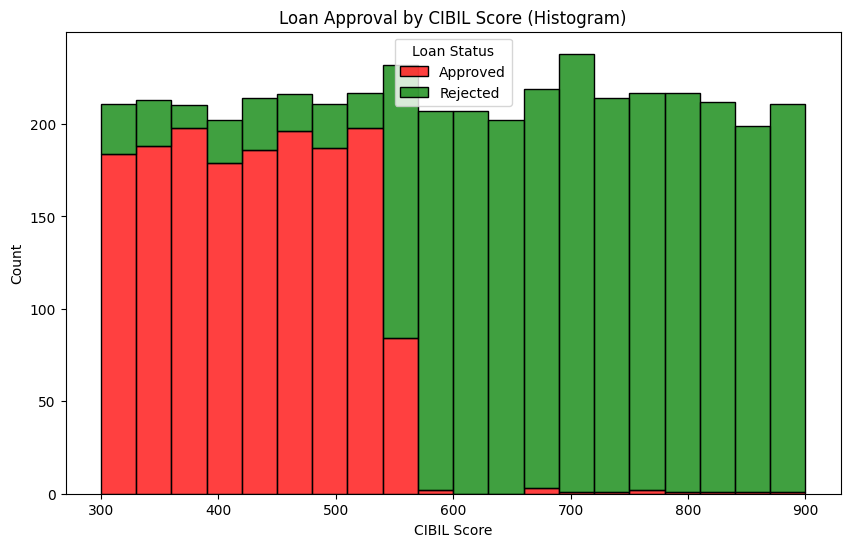

In [148]:
# Create a histogram to visualize whether a loan was approved or rejected based on CIBIL score

# Set figure size
plt.figure(figsize=(10, 6))

# Define your color palette
color_palette = {"Approved": "green", "Rejected": "red"}

# Create histogram
ax = sns.histplot(data=df, x='cibil_score', hue='loan_status', bins=20, multiple='stack', palette=color_palette)

plt.title('Loan Approval by CIBIL Score (Histogram)')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')

# Explicitly add legend
ax.legend(title='Loan Status', labels=['Approved', 'Rejected'])

plt.show()

### Check for outliers in numerical columns

In [82]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(column):
    if column.dtype in ['int64', 'float64']:
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (column < lower_bound) | (column > upper_bound)
        return outliers
    else:
        return pd.Series(False, index=column.index)

# Check for outliers in each numeric column of the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
outliers_dict = {}

for column in numeric_columns.columns:
    outliers = detect_outliers_iqr(numeric_columns[column])
    outliers_dict[column] = sum(outliers)

print("Number of outliers in each numeric column:")
print(outliers_dict)

Number of outliers in each numeric column:
{'no_of_dependents': 0, 'income_annum': 0, 'loan_amount': 0, 'loan_term': 0, 'cibil_score': 0, 'residential_assets_value': 52, 'commercial_assets_value': 37, 'luxury_assets_value': 0, 'bank_asset_value': 5}


### Create box and whisker plots for numerical variables with outliers to visualize

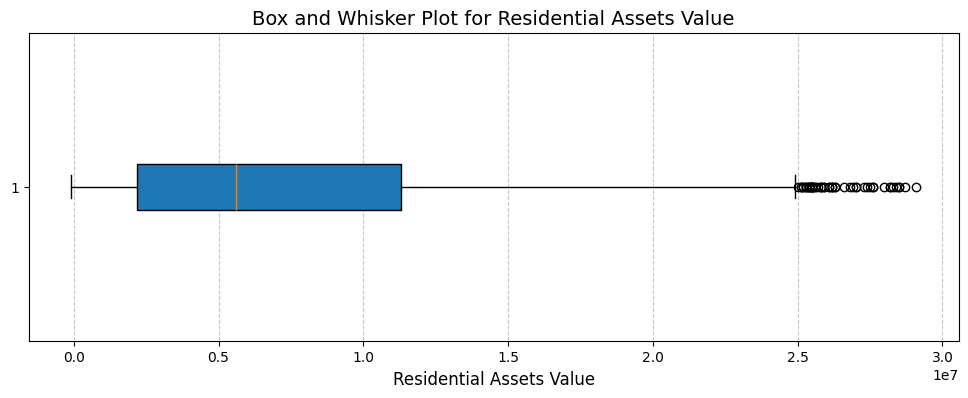

In [98]:
# Create a box and whisker plot for 'residential_assets_value'
plt.figure(figsize=(12, 4))  # Set the figure size
plt.boxplot(df['residential_assets_value'], vert=False, patch_artist=True)

# Customizations
colors = ['lightblue']  # Color for the boxes
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.xlabel('Residential Assets Value', fontsize=12)
plt.title('Box and Whisker Plot for Residential Assets Value', fontsize=14)

plt.show()

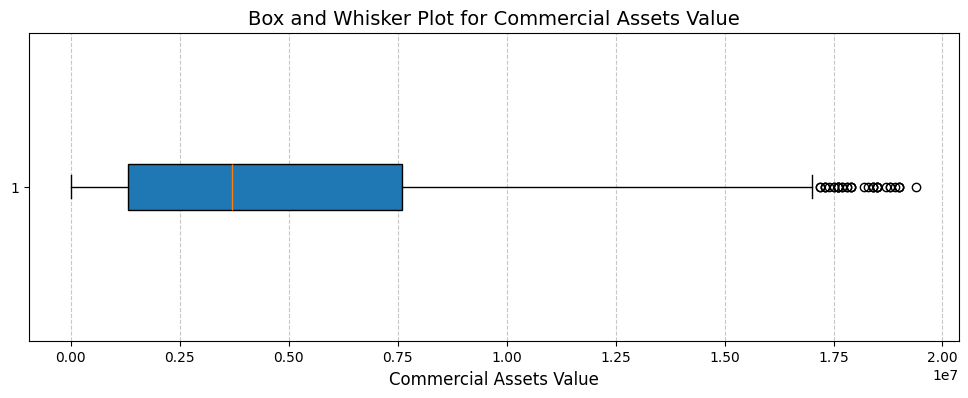

In [96]:
# Create a box and whisker plot for 'commercial_assets_value'
plt.figure(figsize=(12, 4))  # Set the figure size
plt.boxplot(df['commercial_assets_value'], vert=False, patch_artist=True)

# Customizations
colors = ['lightblue']  # Color for the boxes
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.xlabel('Commercial Assets Value', fontsize=12)
plt.title('Box and Whisker Plot for Commercial Assets Value', fontsize=14)

plt.show()

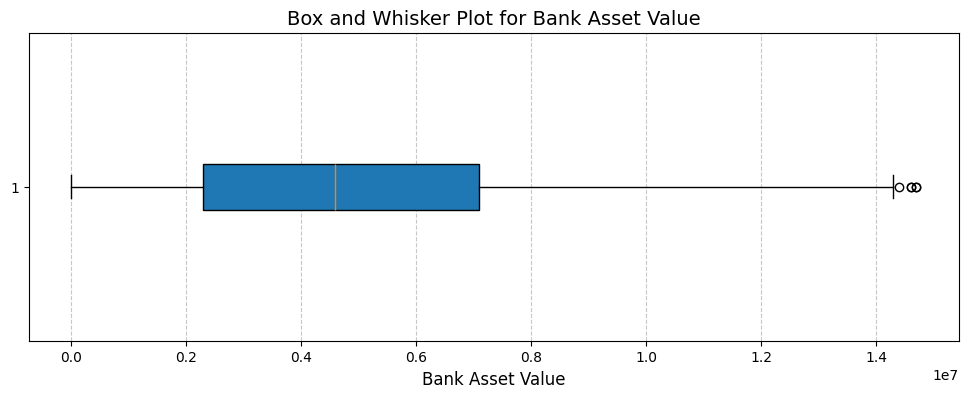

In [97]:
# Create a box and whisker plot for 'bank_asset_value'
plt.figure(figsize=(12, 4))  # Set the figure size
plt.boxplot(df['bank_asset_value'], vert=False, patch_artist=True)

# Customizations
colors = ['lightblue']  # Color for the boxes
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.xlabel('Bank Asset Value', fontsize=12)
plt.title('Box and Whisker Plot for Bank Asset Value', fontsize=14)

plt.show()

We have no reason to believe these outliers are caused by error, and may present valuable information about loan approval rates, so we will keep them in the dataset. 